<a href="https://colab.research.google.com/github/quimHM/QHM_TFG_repository/blob/main/MAB_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://towardsdatascience.com/multi-armed-bandits-and-reinforcement-learning-dc9001dcb8da
#https://towardsdatascience.com/the-upper-confidence-bound-ucb-bandit-algorithm-c05c2bf4c13f

#https://github.com/WhatIThinkAbout/BabyRobot/tree/master/Multi_Armed_Bandits

In [2]:
# import modules 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

In [ ]:
class eps_bandit:
    '''
    epsilon-greedy k-bandit problem
    
    Inputs
    =====================================================
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
    
    def __init__(self, k, eps, iters, mu='random'):
        # Number of arms
        self.k = k
        # Search probability
        self.eps = eps
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
        
    def pull(self):
        # Generate random number
        p = np.random.rand()
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

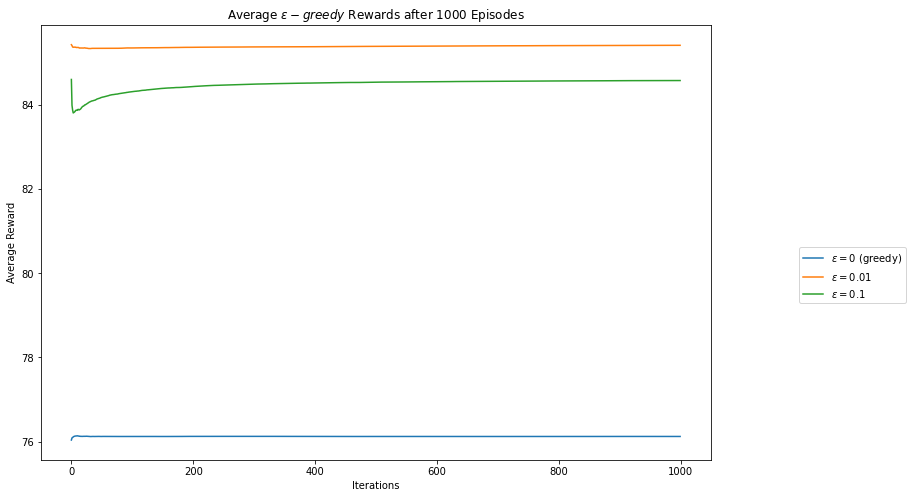

In [ ]:
k = 8
iters = 1000

eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

hmda_mu = [85.55, 81.93, 82.84, 79.94, 71.03, 66.35, 74.71, 67.31]

episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters, hmda_mu)
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (
        eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) 
    + " Episodes")
plt.show()

In [ ]:
print(eps_01.k_n)

[989.   1.   0.   2.   3.   0.   4.   1.]


## **RELLEVANT A PARTIR D'AQUÍ**

In [1]:
class PowerSocket:
    """ the base power socket class """
    
    def __init__(self, q, cl, var=1):                
        self.q = q        # the true reward value 
        self.confidence_level = cl          
        self.var = var   
        self.initialize() # reset the socket
        
    def initialize(self):
        self.Q = 0   # the estimate of this socket's reward value                
        self.n = 0   # the number of times this socket has been tried        
    
    def charge(self):
        """ return a random amount of charge """
        
        # the reward is a guassian distribution with unit variance around the true
        # value 'q'
        value = self.var * np.random.randn() + self.q        
        
        # never allow a charge less than 0 to be returned        
        return 0 if value < 0 else value
                    
    def update(self,R):
        """ update this socket after it has returned reward value 'R' """     
    
        # increment the number of times this socket has been tried
        self.n += 1

        # the new estimate of the mean is calculated from the old estimate
        self.Q = (1 - 1.0/self.n) * self.Q + (1.0/self.n) * R

    def uncertainty(self, t): 
        """ calculate the uncertainty in the estimate of this socket's mean """
        if self.n == 0: return float('inf')                         
        return self.confidence_level * (np.sqrt(np.log(t) / self.n))         
        
    def sample(self,t):
        """ the UCB reward is the estimate of the mean reward plus its uncertainty """
        return self.Q + self.uncertainty(t) 

In [3]:
# return the index of the largest value in the supplied list
# - arbitrarily select between the largest values in the case of a tie
# (the standard np.argmax just chooses the first value in the case of a tie)
def random_argmax(value_list):
  """ a random tie-breaking argmax"""
  values = np.asarray(value_list)
  return np.argmax(np.random.random(values.shape) * (values==values.max()))


In [4]:
class SocketTester():
    """ create and test a set of sockets over a single test run """

    def __init__(self, socket, socket_order, confidence_level):  
        
        # create supplied socket type with a mean value defined by socket order 
        self.sockets = [socket(q, confidence_level) for q in socket_order]     
        
        # set the number of sockets equal to the number created
        self.number_of_sockets = len(self.sockets)

        self.number_of_stats = 2                 
            
    def initialize_run(self, number_of_steps):
        """ reset counters at the start of a run """
        
        # save the number of steps over which the run will take place
        self.number_of_steps = number_of_steps
        
        # reset the actual number of steps that the test ran for
        self.total_steps = 0
        
        # monitor the total reward obtained over the run
        self.total_reward = 0
        
        # the current total reward at each timestep of the run
        self.total_reward_per_timestep = []
        
        # the actual reward obtained at each timestep
        self.reward_per_timestep = []
           
        # stats for each time-step
        # - by default records: estimate, number of trials
        self.socket_stats = np.zeros(shape=(number_of_steps+1, 
                                            self.number_of_sockets, 
                                            self.number_of_stats))
        
        # ensure that all sockets are re-initialized
        for socket in self.sockets: socket.initialize()
            
                                
    def charge_and_update(self,socket_index):
        """ charge from & update the specified socket and associated parameters """
        
        # charge from the chosen socket and update its mean reward value
        reward = self.sockets[socket_index].charge()
        self.sockets[socket_index].update(reward)

        # update the total reward
        self.total_reward += reward   
        
        # store the current total reward at this timestep
        self.total_reward_per_timestep.append(self.total_reward)
        
        # store the reward obtained at this timestep
        self.reward_per_timestep.append(reward)        
        
        
    def get_socket_stats( self, t ):
        """ get the current information from each socket """        
        socket_stats = [[socket.Q, socket.n] for socket in self.sockets]
        return socket_stats     
    
    def get_mean_reward( self ):
        """ the total reward averaged over the number of time steps """
        return (self.total_reward/self.total_steps)
    
    def get_total_reward_per_timestep( self ):
        """ the cumulative total reward at each timestep of the run """
        return self.total_reward_per_timestep
    
    def get_reward_per_timestep( self ):
        """ the actual reward obtained at each timestep of the run """
        return self.reward_per_timestep
    
    def get_estimates(self):
        """ get the estimate of each socket's reward at each timestep of the run """
        return self.socket_stats[:,:,0]  
    
    def get_number_of_trials(self):
        """ get the number of trials of each socket at each timestep of the run """
        return self.socket_stats[:,:,1]          
                
    def get_socket_percentages( self ):
        """ get the percentage of times each socket was tried over the run """
        return (self.socket_stats[:,:,1][self.total_steps]/self.total_steps)        
    
    def get_time_steps( self ):
        """ get the number of time steps that the test ran for """
        return self.total_steps
    
    def select_socket( self, t ):
        """ Greedy Socket Selection"""
        
        # choose the socket with the current highest mean reward or arbitrarily
        # select a socket in the case of a tie            
        socket_index = random_argmax([socket.sample(t+1) for socket in self.sockets]) 
        return socket_index     
    
    
    def run( self, number_of_steps, maximum_total_reward = float('inf')):  
        """ perform a single run, over the set of sockets, 
            for the defined number of steps """
        
        # reset the run counters
        self.initialize_run(number_of_steps)
        
        # loop for the specified number of time-steps
        for t in range(number_of_steps):

            # get information about all sockets at the start of the time step
            self.socket_stats[t] = self.get_socket_stats(t)            
            
            # select a socket
            socket_index = self.select_socket(t)
            
            # charge from the chosen socket and update its mean reward value
            self.charge_and_update(socket_index)
            
            # test if the accumulated total reward is greater than the maximum
            if self.total_reward > maximum_total_reward:
                break
       
        # save the actual number of steps that have been run
        self.total_steps = t    
    
        # get the stats for each socket at the end of the run        
        self.socket_stats[t+1] = self.get_socket_stats(t+1)           
        
        return self.total_steps, self.total_reward
  

In [5]:
test = SocketTester(PowerSocket, [85.55, 81.93, 82.84, 79.94, 71.03, 66.35, 74.71, 67.31], 5)
test.run(1000)
test.get_number_of_trials()[-1]

array([956.,  14.,  19.,   6.,   1.,   1.,   2.,   1.])

In [6]:
class SocketTesterBatch():
    """ create and test a set of sockets over a single test run """

    def __init__(self, socket, socket_order, confidence_level):  
        
        # create supplied socket type with a mean value defined by socket order 
        self.sockets = [socket(q, confidence_level) for q in socket_order]     
        
        # set the number of sockets equal to the number created
        self.number_of_sockets = len(self.sockets)

        self.number_of_stats = 2                 
            
    def initialize_run(self, number_of_steps):
        """ reset counters at the start of a run """
        
        # save the number of steps over which the run will take place
        self.number_of_steps = number_of_steps
        
        # reset the actual number of steps that the test ran for
        self.total_steps = 0
        
        # monitor the total reward obtained over the run
        self.total_reward = 0
        
        # the current total reward at each timestep of the run
        self.total_reward_per_timestep = []
        
        # the actual reward obtained at each timestep
        self.reward_per_timestep = []
           
        # stats for each time-step
        # - by default records: estimate, number of trials
        self.socket_stats = np.zeros(shape=(number_of_steps+1, 
                                            self.number_of_sockets, 
                                            self.number_of_stats))
        
        # ensure that all sockets are re-initialized
        for socket in self.sockets: socket.initialize()
            
                                
    def charge_and_update(self,socket_index):
        """ charge from & update the specified socket and associated parameters """
        
        # charge from the chosen socket and update its mean reward value
        reward = self.sockets[socket_index].charge()
        self.sockets[socket_index].update(reward)

        # update the total reward
        self.total_reward += reward   
        
        # store the current total reward at this timestep
        self.total_reward_per_timestep.append(self.total_reward)
        
        # store the reward obtained at this timestep
        self.reward_per_timestep.append(reward)        
        
        
    def get_socket_stats( self, t ):
        """ get the current information from each socket """        
        socket_stats = [[socket.Q, socket.n] for socket in self.sockets]
        return socket_stats     
    
    def get_mean_reward( self ):
        """ the total reward averaged over the number of time steps """
        return (self.total_reward/self.total_steps)
    
    def get_total_reward_per_timestep( self ):
        """ the cumulative total reward at each timestep of the run """
        return self.total_reward_per_timestep
    
    def get_reward_per_timestep( self ):
        """ the actual reward obtained at each timestep of the run """
        return self.reward_per_timestep
    
    def get_estimates(self):
        """ get the estimate of each socket's reward at each timestep of the run """
        return self.socket_stats[:,:,0]  
    
    def get_number_of_trials(self):
        """ get the number of trials of each socket at each timestep of the run """
        return self.socket_stats[:,:,1]          
                
    def get_socket_percentages( self ):
        """ get the percentage of times each socket was tried over the run """
        return (self.socket_stats[:,:,1][self.total_steps]/self.total_steps)        
    
    def get_time_steps( self ):
        """ get the number of time steps that the test ran for """
        return self.total_steps
    
    def select_socket( self, t ):
        """ Greedy Socket Selection"""
        
        # choose the socket with the current highest mean reward or arbitrarily
        # select a socket in the case of a tie            
        mask = [self.get_number_of_trials()[t][i]<self.possibles[i] for i in range(len(self.sockets))]
        #print(mask)
        available = [self.sockets[i] for i in range(len(self.sockets)) if (mask[i])]
        socket_max = random_argmax([socket.sample(t+1) for socket in available]) 
        #print(socket_max)
        socket_index = self.sockets.index(available[socket_max])
        return socket_index     
    
    def return_increments(self, decisions_to_consider):
        presence = np.array([i/len(decisions_to_consider) for i in self.possibles])
        selected_presence = np.array(self.get_socket_percentages())
        diff = np.subtract(selected_presence, presence)
        #print(diff)
        #print(diff.sum())
        return diff
    
    def run( self, decisions_to_consider, max_percent_decisions=1, prints_bool = True):  
        """ perform a single run, over the set of sockets, 
            for the defined number of steps """
        
        # reset the run counters
        self.initialize_run(len(decisions_to_consider))

        self.possibles = [0]*8 #TODO: DEPENDS ON N OF CLUSTER (DECISIONS.UNIQUE() ISNT ENOUGH BECAUSE IT CAN LACK SOME INSTANCES)
        for i in np.unique(np.array(decisions_to_consider)):
          self.possibles[i] = decisions_to_consider.count(i) 

        usos = 0
        usos_maxims = math.floor(max_percent_decisions*len(decisions_to_consider))
        #print(usos_maxims)

        # loop for the specified number of time-steps
        for t in range(len(decisions_to_consider)):

            # get information about all sockets at the start of the time step
            self.socket_stats[t] = self.get_socket_stats(t)            
            
            # select a socket
            socket_index = self.select_socket(t)
            #if(decisions_to_consider[t]==socket_index):
            if(self.get_number_of_trials()[t][socket_index]<self.possibles[socket_index]):
              # charge from the chosen socket and update its mean reward value
              self.charge_and_update(socket_index)
              usos+=1
              
              if usos > usos_maxims:
                  #print(usos,usos_maxims)
                  break
        # save the actual number of steps that have been run
        self.total_steps = t    
    
        # get the stats for each socket at the end of the run        
        self.socket_stats[t+1] = self.get_socket_stats(t+1)           
        
        if(prints_bool):
          #print("Reward distribution:",[s.q for s in self.sockets])
          #print("Intances of each cluster:",self.possibles)
          print("Presence of each in batch (%):",[100*i/len(decisions_to_consider) for i in self.possibles])
          #print("Times selected:",self.get_number_of_trials()[t])
          print("Relative approval rate (%):",[round(100*self.get_number_of_trials()[t][i]/self.possibles[i],2) if self.possibles[i]>0.0 else 0.0 for i in range(len(self.possibles))])
          print("Percentage over total selected (%):",[round(100*p,2) for p in self.get_socket_percentages()])
          #print("For a total reward:",self.total_reward)


        return self.total_steps, self.total_reward, self.return_increments(decisions_to_consider)
  

In [7]:
import math
import random

In [8]:
test2 = SocketTesterBatch(PowerSocket, np.array([.8555, .8193, .8284, .7994, .7103, .6635, .7471, .6731])*100, 5)

decisions = random.choices(range(8), k=1000)
ts,tr,_ = test2.run(decisions)

Presence of each in batch (%): [12.2, 11.3, 12.6, 13.6, 12.4, 12.7, 13.6, 11.6]
Relative approval rate (%): [100.0, 100.0, 100.0, 100.0, 100.0, 99.21, 100.0, 100.0]
Percentage over total selected (%): [12.21, 11.31, 12.61, 13.61, 12.41, 12.61, 13.61, 11.61]


In [9]:
ts,tr,_ = test2.run(decisions, 0.8)

Presence of each in batch (%): [12.2, 11.3, 12.6, 13.6, 12.4, 12.7, 13.6, 11.6]
Relative approval rate (%): [100.0, 100.0, 100.0, 100.0, 100.0, 12.6, 100.0, 23.28]
Percentage over total selected (%): [15.25, 14.12, 15.75, 17.0, 15.5, 2.0, 17.0, 3.38]


In [10]:
sample_bias = [0.555, 0.24, 0.023, 0.011, 0.087, 0.081, 0.001, 0.001]
sample_bias_decisions = random.choices(range(8),weights=sample_bias,k=1000)
#print(sample_bias_decisions)
ts,tr,_ = test2.run(sample_bias_decisions, 0.8)

Presence of each in batch (%): [55.2, 23.9, 2.4, 1.0, 9.1, 7.9, 0.3, 0.2]
Relative approval rate (%): [100.0, 86.61, 100.0, 100.0, 2.2, 1.27, 100.0, 50.0]
Percentage over total selected (%): [69.0, 25.87, 3.0, 1.25, 0.25, 0.12, 0.38, 0.12]


###**NON-STATIC**

In [11]:
#def f(probs, val, ind):
#    probs[ind] += val
#    mask = np.ones(len(probs), bool)
#    mask[ind] = False
#    probs[mask] -= val / (len(probs) - 1)
#    return np.clip(probs, 0, np.infty) / np.sum(np.clip(probs, 0, np.infty))

In [12]:
def cummulative_sample(tester,iter,orig, coef):
  instances_distribution = np.array(orig)
  for i in range(iter):
    pbool=False
    if(i%math.ceil(iter/4)==0 or i==iter-1):
      print(i)
      #print(list(instances_distribution))
      pbool=True

    decisions = random.choices(range(8),weights=list(instances_distribution),k=1000)
    ts,tr,ti = tester.run(decisions, 0.8, pbool)
    
    #for i in range(len(ti)):
    #  instances_distribution = f(instances_distribution,ti[i],i)
    instances_distribution = np.add(instances_distribution,ti*coef)
    instances_distribution = np.clip(instances_distribution,0,None)
    instances_distribution = instances_distribution / instances_distribution.sum()

In [13]:
o_sample_bias = [0.555, 0.24, 0.023, 0.011, 0.087, 0.081, 0.001, 0.001]
cummulative_sample(test2,35,o_sample_bias,0.05)

0
Presence of each in batch (%): [55.3, 23.0, 2.4, 0.6, 9.7, 8.5, 0.4, 0.1]
Relative approval rate (%): [100.0, 91.74, 100.0, 100.0, 2.06, 1.18, 50.0, 100.0]
Percentage over total selected (%): [69.12, 26.38, 3.0, 0.75, 0.25, 0.12, 0.25, 0.12]
9
Presence of each in batch (%): [62.7, 21.7, 3.0, 1.8, 5.7, 5.0, 0.1, 0.0]
Relative approval rate (%): [100.0, 55.76, 100.0, 100.0, 3.51, 2.0, 100.0, 0.0]
Percentage over total selected (%): [78.38, 15.12, 3.75, 2.25, 0.25, 0.12, 0.12, 0.0]
18
Presence of each in batch (%): [67.4, 21.1, 3.0, 1.3, 3.9, 3.1, 0.1, 0.1]
Relative approval rate (%): [100.0, 37.44, 100.0, 100.0, 2.56, 3.23, 100.0, 100.0]
Percentage over total selected (%): [84.25, 9.88, 3.75, 1.62, 0.12, 0.12, 0.12, 0.12]
27
Presence of each in batch (%): [76.7, 14.2, 2.9, 0.9, 2.4, 2.4, 0.3, 0.2]
Relative approval rate (%): [99.48, 7.04, 58.62, 55.56, 4.17, 4.17, 66.67, 50.0]
Percentage over total selected (%): [95.38, 1.25, 2.12, 0.62, 0.12, 0.12, 0.25, 0.12]
34
Presence of each in b

In [14]:
no_sample_bias = [1/8]*8
cummulative_sample(test2,35,no_sample_bias,0.05)

0
Presence of each in batch (%): [12.5, 11.3, 10.8, 13.8, 12.8, 12.4, 14.2, 12.2]
Relative approval rate (%): [100.0, 100.0, 100.0, 100.0, 100.0, 10.48, 100.0, 27.05]
Percentage over total selected (%): [15.62, 14.12, 13.5, 17.25, 16.0, 1.62, 17.75, 4.12]
9
Presence of each in batch (%): [13.5, 16.9, 14.8, 13.1, 14.3, 7.6, 13.4, 6.4]
Relative approval rate (%): [100.0, 100.0, 100.0, 100.0, 49.65, 6.58, 100.0, 10.94]
Percentage over total selected (%): [16.88, 21.12, 18.5, 16.38, 8.88, 0.62, 16.75, 0.88]
18
Presence of each in batch (%): [14.9, 16.3, 16.6, 12.4, 12.2, 5.9, 15.9, 5.8]
Relative approval rate (%): [100.0, 100.0, 100.0, 100.0, 24.59, 6.78, 100.0, 8.62]
Percentage over total selected (%): [18.62, 20.38, 20.75, 15.5, 3.75, 0.5, 19.88, 0.62]
27
Presence of each in batch (%): [19.6, 16.3, 14.6, 18.5, 7.3, 4.5, 15.2, 4.0]
Relative approval rate (%): [100.0, 100.0, 100.0, 100.0, 12.33, 6.67, 62.5, 7.5]
Percentage over total selected (%): [24.5, 20.38, 18.25, 23.12, 1.12, 0.38, 11

In [15]:
no_sample_bias = [1/8]*8
cummulative_sample(test2,150,no_sample_bias,0.05)

0
Presence of each in batch (%): [11.4, 12.6, 12.2, 12.5, 13.2, 12.7, 12.4, 13.0]
Relative approval rate (%): [100.0, 100.0, 100.0, 100.0, 100.0, 18.11, 100.0, 26.15]
Percentage over total selected (%): [14.25, 15.75, 15.25, 15.62, 16.5, 2.88, 15.5, 4.25]
38
Presence of each in batch (%): [19.0, 20.6, 20.4, 19.3, 4.9, 2.1, 11.4, 2.3]
Relative approval rate (%): [100.0, 100.0, 100.0, 98.45, 4.08, 4.76, 4.39, 8.7]
Percentage over total selected (%): [23.75, 25.75, 25.5, 23.75, 0.25, 0.12, 0.62, 0.25]
76
Presence of each in batch (%): [31.0, 24.0, 33.0, 8.0, 0.9, 0.7, 2.1, 0.3]
Relative approval rate (%): [100.0, 55.83, 100.0, 23.75, 22.22, 14.29, 14.29, 33.33]
Percentage over total selected (%): [38.75, 16.75, 41.25, 2.38, 0.25, 0.12, 0.38, 0.12]
114
Presence of each in batch (%): [50.5, 10.4, 34.6, 3.3, 0.1, 0.1, 0.8, 0.2]
Relative approval rate (%): [100.0, 52.88, 64.16, 39.39, 100.0, 100.0, 25.0, 50.0]
Percentage over total selected (%): [63.12, 6.88, 27.75, 1.62, 0.12, 0.12, 0.25, 0.

In [16]:
def nonstatic(iter, rewards_d_o, r_coef, instances_d_o, i_coef):
  rewards_d = np.array(rewards_d_o)
  instances_d = np.array(instances_d_o)

  #iter = 1000
  for i in range(iter):
    pbool=False
    if(i%math.ceil(iter/4)==0 or i==iter-1):
        print(i)
        #print(list(instances_distribution))
        pbool=True

    updated_test = SocketTesterBatch(PowerSocket, list(rewards_d), 5)
    decisions = random.choices(range(8),weights=list(instances_d),k=1000)
    ts,tr,ti = updated_test.run(decisions, 0.8, pbool)

    increments = ti
    #increments = np.subtract(np.array(updated_test.get_socket_percentages()),0.5)
    #print(increments)

    rewards_d = np.add(rewards_d,increments*r_coef*100)
    rewards_d = np.clip(rewards_d,0,100)
    #print(rewards_d)

    instances_d = np.add(instances_d,increments*i_coef)
    instances_d = np.clip(instances_d,0,None)
    instances_d = instances_d / instances_d.sum()

In [17]:
rewards_bias = np.array([.8555, .8193, .8284, .7994, .7103, .6635, .7471, .6731])*100
rewards_nonbias = [100/2]*8

instances_bias = [0.555, 0.24, 0.023, 0.011, 0.087, 0.081, 0.001, 0.001]
instances_nonbias = [1/8]*8

In [18]:
nonstatic(100, rewards_nonbias, 0, instances_nonbias, 0)

0
Presence of each in batch (%): [13.4, 12.0, 12.6, 13.0, 12.7, 13.6, 11.0, 11.7]
Relative approval rate (%): [73.13, 64.17, 95.24, 93.85, 81.89, 75.0, 73.64, 82.05]
Percentage over total selected (%): [12.25, 9.62, 15.0, 15.25, 13.0, 12.75, 10.12, 12.0]
25
Presence of each in batch (%): [13.3, 12.6, 12.5, 11.1, 12.7, 13.3, 13.6, 10.9]
Relative approval rate (%): [63.16, 52.38, 68.8, 76.58, 100.0, 100.0, 80.88, 100.0]
Percentage over total selected (%): [10.5, 8.25, 10.75, 10.62, 15.88, 16.62, 13.75, 13.63]
50
Presence of each in batch (%): [10.6, 14.0, 13.1, 13.9, 12.1, 10.8, 13.0, 12.5]
Relative approval rate (%): [100.0, 83.57, 81.68, 64.03, 72.73, 83.33, 64.62, 95.2]
Percentage over total selected (%): [13.25, 14.62, 13.38, 11.12, 11.0, 11.25, 10.5, 14.88]
75
Presence of each in batch (%): [11.4, 13.6, 10.0, 13.4, 13.4, 12.6, 13.7, 11.9]
Relative approval rate (%): [80.7, 55.15, 97.0, 63.43, 97.01, 97.62, 64.96, 91.6]
Percentage over total selected (%): [11.5, 9.38, 12.12, 10.62, 1

In [19]:
nonstatic(2500, rewards_nonbias, 0, instances_bias, 0.01)

0
Presence of each in batch (%): [56.6, 22.4, 2.4, 0.7, 8.1, 9.5, 0.0, 0.3]
Relative approval rate (%): [64.66, 100.0, 100.0, 100.0, 100.0, 100.0, 0.0, 100.0]
Percentage over total selected (%): [45.75, 28.0, 3.0, 0.88, 10.12, 11.88, 0.0, 0.38]


KeyboardInterrupt: ignored

In [ ]:
nonstatic(100, rewards_bias, 0, instances_nonbias, 0)

In [ ]:
nonstatic(100, rewards_bias, 0.1, instances_nonbias, 0)

In [ ]:
nonstatic(100, rewards_bias, 0, instances_bias, 0.01)

In [ ]:
nonstatic(100, rewards_bias, 0.01, instances_bias, 0)

In [ ]:
nonstatic(100, rewards_bias, 0.01, instances_bias, 0.01)

###**SOLUTION?**

In [82]:
class SocketTesterBatchSOLUTION():
    """ create and test a set of sockets over a single test run """

    def __init__(self, socket, socket_order, confidence_level, sub_opt):  
        
        self.subopt_coef = sub_opt

        # create supplied socket type with a mean value defined by socket order 
        self.sockets = [socket(q, confidence_level) for q in socket_order]     
        
        # set the number of sockets equal to the number created
        self.number_of_sockets = len(self.sockets)

        self.number_of_stats = 2                 
            
    def initialize_run(self, number_of_steps):
        """ reset counters at the start of a run """
        
        # save the number of steps over which the run will take place
        self.number_of_steps = number_of_steps
        
        # reset the actual number of steps that the test ran for
        self.total_steps = 0
        
        # monitor the total reward obtained over the run
        self.total_reward = 0
        
        # the current total reward at each timestep of the run
        self.total_reward_per_timestep = []
        
        # the actual reward obtained at each timestep
        self.reward_per_timestep = []
           
        # stats for each time-step
        # - by default records: estimate, number of trials
        self.socket_stats = np.zeros(shape=(number_of_steps+1, 
                                            self.number_of_sockets, 
                                            self.number_of_stats))
        
        # ensure that all sockets are re-initialized
        for socket in self.sockets: socket.initialize()
            
                                
    def charge_and_update(self,socket_index):
        """ charge from & update the specified socket and associated parameters """
        
        # charge from the chosen socket and update its mean reward value
        reward = self.sockets[socket_index].charge()
        self.sockets[socket_index].update(reward)

        # update the total reward
        self.total_reward += reward   
        
        # store the current total reward at this timestep
        self.total_reward_per_timestep.append(self.total_reward)
        
        # store the reward obtained at this timestep
        self.reward_per_timestep.append(reward)        
        
        
    def get_socket_stats( self, t ):
        """ get the current information from each socket """        
        socket_stats = [[socket.Q, socket.n] for socket in self.sockets]
        return socket_stats     
    
    def get_mean_reward( self ):
        """ the total reward averaged over the number of time steps """
        return (self.total_reward/self.total_steps)
    
    def get_total_reward_per_timestep( self ):
        """ the cumulative total reward at each timestep of the run """
        return self.total_reward_per_timestep
    
    def get_reward_per_timestep( self ):
        """ the actual reward obtained at each timestep of the run """
        return self.reward_per_timestep
    
    def get_estimates(self):
        """ get the estimate of each socket's reward at each timestep of the run """
        return self.socket_stats[:,:,0]  
    
    def get_number_of_trials(self):
        """ get the number of trials of each socket at each timestep of the run """
        return self.socket_stats[:,:,1]          
                
    def get_socket_percentages( self ):
        """ get the percentage of times each socket was tried over the run """
        return (self.socket_stats[:,:,1][self.total_steps]/self.total_steps)        
    
    def get_time_steps( self ):
        """ get the number of time steps that the test ran for """
        return self.total_steps
    
    def select_socket( self, t ):
        """ Greedy Socket Selection"""
        #CONSTRAINT A
        curr_percentages = self.socket_stats[:,:,1][t]/t
        mean_percentages = np.mean(curr_percentages)
        dif_percentages = np.subtract(mean_percentages,self.socket_stats[:,:,1][t]/t)

        #CONSTRAINT B
        mean_selections = np.mean(self.get_number_of_trials()[t])
        dif_selections = np.subtract(mean_selections,self.get_number_of_trials()[t])

        #DUES CONSTRAINTS, UNA PER PERCENTATGES, L'ALTRE n SELECTIONS
        #dif = dif_percentages #rang 10-30-50
        dif = dif_selections   #rang 0-0.01-0.1

        #print(dif)

        # choose the socket with the current highest mean reward or arbitrarily
        # select a socket in the case of a tie            
        mask = [self.get_number_of_trials()[t][i]<self.possibles[i] for i in range(len(self.sockets))]
        #print(mask)
        available_sockets = [self.sockets[s] for s in range(len(self.sockets)) if (mask[s])]
        available = [i for i in range(len(self.sockets)) if (mask[i])]

        socket_max = random_argmax([self.sockets[socket].sample(t+1)+self.subopt_coef*dif[socket] for socket in available]) 
        #socket_max = random_argmax([self.sockets[socket].sample(t+1) for socket in available]) 

        #print(socket_max)
        socket_index = self.sockets.index(available_sockets[socket_max])
        return socket_index     
    
    def return_increments(self, decisions_to_consider):
        presence = np.array([i/len(decisions_to_consider) for i in self.possibles])
        selected_presence = np.array(self.get_socket_percentages())
        diff = np.subtract(selected_presence, presence)
        #print(diff)
        #print(diff.sum())
        return diff
    
    def run( self, decisions_to_consider, max_percent_decisions=1, prints_bool = True):  
        """ perform a single run, over the set of sockets, 
            for the defined number of steps """
        
        # reset the run counters
        self.initialize_run(len(decisions_to_consider))

        self.possibles = [0]*8 #TODO: DEPENDS ON N OF CLUSTER (DECISIONS.UNIQUE() ISNT ENOUGH BECAUSE IT CAN LACK SOME INSTANCES)
        for i in np.unique(np.array(decisions_to_consider)):
          self.possibles[i] = decisions_to_consider.count(i) 
        #print("possibles",self.possibles)

        usos = 0
        usos_maxims = math.floor(max_percent_decisions*len(decisions_to_consider))
        #print(usos_maxims)

        # loop for the specified number of time-steps
        for t in range(1,len(decisions_to_consider)):

            # get information about all sockets at the start of the time step
            self.socket_stats[t] = self.get_socket_stats(t)            
            
            # select a socket
            socket_index = self.select_socket(t)
            #if(decisions_to_consider[t]==socket_index):
            if(self.get_number_of_trials()[t][socket_index]<self.possibles[socket_index]):
              # charge from the chosen socket and update its mean reward value
              self.charge_and_update(socket_index)
              usos+=1
              
              if usos > usos_maxims:
                  #print(usos,usos_maxims)
                  break
        # save the actual number of steps that have been run
        self.total_steps = t    
    
        # get the stats for each socket at the end of the run        
        self.socket_stats[t+1] = self.get_socket_stats(t+1)           
        
        if(prints_bool):
          #print("possibles",self.possibles)
          #print("Reward distribution:",[s.q for s in self.sockets])
          #print("Intances of each cluster:",self.possibles)
          print("Presence of each in batch (%):",[100*i/len(decisions_to_consider) for i in self.possibles])
          print("Times selected:",self.get_number_of_trials()[t])
          print("Relative approval rate (%):",[round(100*self.get_number_of_trials()[t][i]/self.possibles[i],2) if self.possibles[i]>0.0 else 0.0 for i in range(len(self.possibles))])
          print("Percentage over total selected (%):",[round(100*p,2) for p in self.get_socket_percentages()])
          #print("For a total reward:",self.total_reward)
          #print(self.return_increments(decisions_to_consider))

        return self.total_steps, self.total_reward, self.return_increments(decisions_to_consider)
  

In [83]:
sol_test = SocketTesterBatch(PowerSocket, list(rewards_bias), 5)
decisions = random.choices(range(8),weights=list(instances_bias),k=1000)
ts,tr,ti = sol_test.run(decisions, 0.8, True)

Presence of each in batch (%): [54.8, 25.0, 1.6, 1.2, 9.7, 7.6, 0.0, 0.1]
Relative approval rate (%): [100.0, 88.0, 100.0, 100.0, 2.06, 1.32, 0.0, 100.0]
Percentage over total selected (%): [68.5, 27.5, 2.0, 1.5, 0.25, 0.12, 0.0, 0.12]


In [84]:
sol_test = SocketTesterBatchSOLUTION(PowerSocket, list(rewards_bias), 5, 0)
decisions = random.choices(range(8),weights=list(instances_bias),k=1000)
ts,tr,ti = sol_test.run(decisions, 0.8, True)

Presence of each in batch (%): [55.1, 22.2, 2.5, 1.3, 10.3, 8.5, 0.0, 0.1]
Times selected: [551. 207.  25.  13.   2.   1.   0.   1.]
Relative approval rate (%): [100.0, 93.24, 100.0, 100.0, 1.94, 1.18, 0.0, 100.0]
Percentage over total selected (%): [68.79, 25.84, 3.12, 1.62, 0.25, 0.12, 0.0, 0.12]


In [85]:
sol_test = SocketTesterBatchSOLUTION(PowerSocket, list(rewards_bias), 5, 0.01)
decisions = random.choices(range(8),weights=list(instances_bias),k=1000)
ts,tr,ti = sol_test.run(decisions, 0.8, True)

Presence of each in batch (%): [56.2, 23.9, 2.4, 0.5, 8.8, 7.9, 0.0, 0.3]
Times selected: [548. 217.  24.   5.   3.   1.   0.   2.]
Relative approval rate (%): [97.51, 90.79, 100.0, 100.0, 3.41, 1.27, 0.0, 66.67]
Percentage over total selected (%): [68.41, 27.09, 3.0, 0.62, 0.37, 0.12, 0.0, 0.25]


In [86]:
sol_test = SocketTesterBatchSOLUTION(PowerSocket, list(rewards_bias), 5, 0.1)
decisions = random.choices(range(8),weights=list(instances_bias),k=1000)
ts,tr,ti = sol_test.run(decisions, 0.8, True)

Presence of each in batch (%): [57.8, 22.3, 2.9, 0.8, 8.0, 7.9, 0.1, 0.2]
Times selected: [378. 223.  29.   8.  80.  79.   1.   2.]
Relative approval rate (%): [65.4, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Percentage over total selected (%): [47.19, 27.84, 3.62, 1.0, 9.99, 9.86, 0.12, 0.25]


In [87]:
#sol_test = SocketTesterBatchSOLUTION(PowerSocket, list(rewards_bias), 5, 50)
#decisions = random.choices(range(8),weights=list(instances_bias),k=1000)
#ts,tr,ti = sol_test.run(decisions, 0.8, True)

In [88]:
def nonstatic_sol(iter, rewards_d_o, r_coef, instances_d_o, i_coef, sub_opt):
  rewards_d = np.array(rewards_d_o)
  instances_d = np.array(instances_d_o)

  #iter = 1000
  for i in range(iter):
    pbool=False
    if(i%math.ceil(iter/4)==0 or i==iter-1):
        print(i)
        #print(list(instances_distribution))
        pbool=True

    updated_test = SocketTesterBatchSOLUTION(PowerSocket, list(rewards_d), 5, sub_opt)
    decisions = random.choices(range(8),weights=list(instances_d),k=1000)
    ts,tr,ti = updated_test.run(decisions, 0.8, pbool)

    increments = ti
    #increments = np.subtract(np.array(updated_test.get_socket_percentages()),0.5)
    #print(increments)

    rewards_d = np.add(rewards_d,increments*r_coef*100)
    rewards_d = np.clip(rewards_d,0,100)
    #print(rewards_d)

    instances_d = np.add(instances_d,increments*i_coef)
    instances_d = np.clip(instances_d,0,None)
    instances_d = instances_d / instances_d.sum()

In [93]:
nonstatic_sol(500, rewards_bias, 0.01, instances_bias, 0.01, 0)

0
Presence of each in batch (%): [55.0, 24.5, 2.2, 0.9, 9.8, 7.3, 0.2, 0.1]
Times selected: [550. 213.  22.   9.   2.   1.   2.   1.]
Relative approval rate (%): [100.0, 86.94, 100.0, 100.0, 2.04, 1.37, 100.0, 100.0]
Percentage over total selected (%): [68.66, 26.59, 2.75, 1.12, 0.25, 0.12, 0.25, 0.12]
125
Presence of each in batch (%): [74.0, 15.0, 2.9, 2.5, 2.5, 3.0, 0.0, 0.1]
Times selected: [740.   3.  29.  25.   1.   1.   0.   1.]
Relative approval rate (%): [100.0, 2.0, 100.0, 100.0, 4.0, 3.33, 0.0, 100.0]
Percentage over total selected (%): [92.38, 0.37, 3.62, 3.12, 0.12, 0.12, 0.0, 0.12]
250
Presence of each in batch (%): [91.8, 4.6, 0.9, 0.3, 1.1, 1.2, 0.0, 0.1]
Times selected: [794.   1.   1.   1.   1.   1.   0.   1.]
Relative approval rate (%): [86.49, 2.17, 11.11, 33.33, 9.09, 8.33, 0.0, 100.0]
Percentage over total selected (%): [99.13, 0.12, 0.12, 0.12, 0.12, 0.12, 0.0, 0.12]
375
Presence of each in batch (%): [97.3, 1.6, 0.4, 0.2, 0.4, 0.1, 0.0, 0.0]
Times selected: [795

In [94]:
nonstatic_sol(500, rewards_bias, 0.01, instances_bias, 0.01, 0.1)

0
Presence of each in batch (%): [54.7, 25.0, 2.0, 1.1, 9.1, 7.9, 0.2, 0.0]
Times selected: [347. 250.  20.  11.  91.  79.   2.   0.]
Relative approval rate (%): [63.44, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 0.0]
Percentage over total selected (%): [43.32, 31.21, 2.5, 1.37, 11.36, 9.86, 0.25, 0.0]
125
Presence of each in batch (%): [40.9, 31.7, 2.6, 1.8, 12.0, 10.9, 0.1, 0.0]
Times selected: [209. 317.  26.  18. 120. 109.   1.   0.]
Relative approval rate (%): [51.1, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 0.0]
Percentage over total selected (%): [26.09, 39.58, 3.25, 2.25, 14.98, 13.61, 0.12, 0.0]
250
Presence of each in batch (%): [17.8, 43.5, 5.9, 2.2, 13.7, 16.5, 0.2, 0.2]
Times selected: [  2. 419.  59.  22. 137. 157.   2.   2.]
Relative approval rate (%): [1.12, 96.32, 100.0, 100.0, 100.0, 95.15, 100.0, 100.0]
Percentage over total selected (%): [0.25, 52.31, 7.37, 2.75, 17.1, 19.6, 0.25, 0.25]
375
Presence of each in batch (%): [5.4, 44.6, 4.4, 4.6, 22.7, 17.6, 0.4, 0.3]
Ti

curr_percentages = self.socket_stats[:,:,1][t]/t
mean_percentages = np.mean(curr_percentages)
dif_percentages = np.subtract(mean_percentages,self.socket_stats[:,:,1][t]/t)

mean_selections = np.mean(self.get_number_of_trials()[t])
dif_selections = np.subtract(mean_selections,self.get_number_of_trials()[t])

#DUES CONSTRAINTS, UNA PER PERCENTATGES, L'ALTRE n SELECTIONS
//dif = dif_percentages #rang 10-30-50

dif = dif_selections   #rang 0-0.01-0.1

In [90]:
class SocketTesterBatchSOLUTION_var():
    """ create and test a set of sockets over a single test run """

    def __init__(self, socket, socket_order, confidence_level, sub_opt, var):  
        
        self.subopt_coef = sub_opt

        # create supplied socket type with a mean value defined by socket order 
        self.sockets = [socket(q, confidence_level,var) for q in socket_order]     
        
        # set the number of sockets equal to the number created
        self.number_of_sockets = len(self.sockets)

        self.number_of_stats = 2                 
            
    def initialize_run(self, number_of_steps):
        """ reset counters at the start of a run """
        
        # save the number of steps over which the run will take place
        self.number_of_steps = number_of_steps
        
        # reset the actual number of steps that the test ran for
        self.total_steps = 0
        
        # monitor the total reward obtained over the run
        self.total_reward = 0
        
        # the current total reward at each timestep of the run
        self.total_reward_per_timestep = []
        
        # the actual reward obtained at each timestep
        self.reward_per_timestep = []
           
        # stats for each time-step
        # - by default records: estimate, number of trials
        self.socket_stats = np.zeros(shape=(number_of_steps+1, 
                                            self.number_of_sockets, 
                                            self.number_of_stats))
        
        # ensure that all sockets are re-initialized
        for socket in self.sockets: socket.initialize()
            
                                
    def charge_and_update(self,socket_index):
        """ charge from & update the specified socket and associated parameters """
        
        # charge from the chosen socket and update its mean reward value
        reward = self.sockets[socket_index].charge()
        self.sockets[socket_index].update(reward)

        # update the total reward
        self.total_reward += reward   
        
        # store the current total reward at this timestep
        self.total_reward_per_timestep.append(self.total_reward)
        
        # store the reward obtained at this timestep
        self.reward_per_timestep.append(reward)        
        
        
    def get_socket_stats( self, t ):
        """ get the current information from each socket """        
        socket_stats = [[socket.Q, socket.n] for socket in self.sockets]
        return socket_stats     
    
    def get_mean_reward( self ):
        """ the total reward averaged over the number of time steps """
        return (self.total_reward/self.total_steps)
    
    def get_total_reward_per_timestep( self ):
        """ the cumulative total reward at each timestep of the run """
        return self.total_reward_per_timestep
    
    def get_reward_per_timestep( self ):
        """ the actual reward obtained at each timestep of the run """
        return self.reward_per_timestep
    
    def get_estimates(self):
        """ get the estimate of each socket's reward at each timestep of the run """
        return self.socket_stats[:,:,0]  
    
    def get_number_of_trials(self):
        """ get the number of trials of each socket at each timestep of the run """
        return self.socket_stats[:,:,1]          
                
    def get_socket_percentages( self ):
        """ get the percentage of times each socket was tried over the run """
        return (self.socket_stats[:,:,1][self.total_steps]/self.total_steps)        
    
    def get_time_steps( self ):
        """ get the number of time steps that the test ran for """
        return self.total_steps
    
    def select_socket( self, t ):
        """ Greedy Socket Selection"""
        #CONSTRAINT A
        curr_percentages = self.socket_stats[:,:,1][t]/t
        mean_percentages = np.mean(curr_percentages)
        dif_percentages = np.subtract(mean_percentages,self.socket_stats[:,:,1][t]/t)

        #CONSTRAINT B
        mean_selections = np.mean(self.get_number_of_trials()[t])
        dif_selections = np.subtract(mean_selections,self.get_number_of_trials()[t])

        #DUES CONSTRAINTS, UNA PER PERCENTATGES, L'ALTRE n SELECTIONS
        #dif = dif_percentages #rang 10-30-50
        dif = dif_selections   #rang 0-0.01-0.1

        #print(dif)

        # choose the socket with the current highest mean reward or arbitrarily
        # select a socket in the case of a tie            
        mask = [self.get_number_of_trials()[t][i]<self.possibles[i] for i in range(len(self.sockets))]
        #print(mask)
        available_sockets = [self.sockets[s] for s in range(len(self.sockets)) if (mask[s])]
        available = [i for i in range(len(self.sockets)) if (mask[i])]

        socket_max = random_argmax([self.sockets[socket].sample(t+1)+self.subopt_coef*dif[socket] for socket in available]) 
        #socket_max = random_argmax([self.sockets[socket].sample(t+1) for socket in available]) 

        #print(socket_max)
        socket_index = self.sockets.index(available_sockets[socket_max])
        return socket_index     
    
    def return_increments(self, decisions_to_consider):
        presence = np.array([i/len(decisions_to_consider) for i in self.possibles])
        selected_presence = np.array(self.get_socket_percentages())
        diff = np.subtract(selected_presence, presence)
        #print(diff)
        #print(diff.sum())
        return diff

    def return_increments_distr(self, decisions_to_consider):
        presence = np.array([i/len(decisions_to_consider) for i in self.possibles])
        selected_presence = np.array(self.get_socket_percentages())
        diff = np.subtract(selected_presence, presence)
        #print(diff)
        #print(diff.sum())
        return diff
    
    def run( self, decisions_to_consider, max_percent_decisions=1, prints_bool = True):  
        """ perform a single run, over the set of sockets, 
            for the defined number of steps """
        
        # reset the run counters
        self.initialize_run(len(decisions_to_consider))

        self.possibles = [0]*8 #TODO: DEPENDS ON N OF CLUSTER (DECISIONS.UNIQUE() ISNT ENOUGH BECAUSE IT CAN LACK SOME INSTANCES)
        for i in np.unique(np.array(decisions_to_consider)):
          self.possibles[i] = decisions_to_consider.count(i) 
        #print("possibles",self.possibles)

        usos = 0
        usos_maxims = math.floor(max_percent_decisions*len(decisions_to_consider))
        #print(usos_maxims)

        # loop for the specified number of time-steps
        for t in range(1,len(decisions_to_consider)):

            # get information about all sockets at the start of the time step
            self.socket_stats[t] = self.get_socket_stats(t)            
            
            # select a socket
            socket_index = self.select_socket(t)
            #if(decisions_to_consider[t]==socket_index):
            if(self.get_number_of_trials()[t][socket_index]<self.possibles[socket_index]):
              # charge from the chosen socket and update its mean reward value
              self.charge_and_update(socket_index)
              usos+=1
              
              if usos > usos_maxims:
                  #print(usos,usos_maxims)
                  break
        # save the actual number of steps that have been run
        self.total_steps = t    
    
        # get the stats for each socket at the end of the run        
        self.socket_stats[t+1] = self.get_socket_stats(t+1)           
        
        if(prints_bool):
          #print("possibles",self.possibles)
          #print("Reward distribution:",[s.q for s in self.sockets])
          #print("Intances of each cluster:",self.possibles)
          print("Presence of each in batch (%):",[100*i/len(decisions_to_consider) for i in self.possibles])
          print("Times selected:",self.get_number_of_trials()[t])
          print("Relative approval rate (%):",[round(100*self.get_number_of_trials()[t][i]/self.possibles[i],2) if self.possibles[i]>0.0 else 0.0 for i in range(len(self.possibles))])
          print("Percentage over total selected (%):",[round(100*p,2) for p in self.get_socket_percentages()])
          #print("For a total reward:",self.total_reward)
          #print(self.return_increments(decisions_to_consider))
          print("Estimates:",list(self.get_estimates()[t]))

        return self.total_steps, self.total_reward, self.return_increments(decisions_to_consider)
  

In [91]:
sol_test = SocketTesterBatchSOLUTION_var(PowerSocket, list(rewards_bias), 5, 0, 20) #high variance+sampling bias super injust (la variance de classes menys popualtes afecta mes q altres)
decisions = random.choices(range(8),weights=list(instances_nonbias),k=1000)
ts,tr,ti = sol_test.run(decisions, 0.8, True)

Presence of each in batch (%): [11.9, 11.7, 11.0, 13.0, 13.1, 13.2, 14.7, 11.4]
Times selected: [119. 117.  21. 130. 131. 132. 147.   3.]
Relative approval rate (%): [100.0, 100.0, 19.09, 100.0, 100.0, 100.0, 100.0, 2.63]
Percentage over total selected (%): [14.86, 14.61, 2.62, 16.23, 16.35, 16.48, 18.35, 0.37]
Estimates: [86.36144301201962, 79.92682380817261, 82.73362025976014, 78.8852272319612, 70.00921666401466, 66.92076523584282, 73.50360417578398, 49.811576206755745]
